# Blue Book for Bulldozers

Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

This notebook looks into using various Python-based machine learning and and data science libraries in an attempt to build a machine learning model capable of predicting sale price for bulldozers.

We're going to take the following approach:

* Problem definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

## 1. Problem Statement

How well can we predict the future sale price of a bulldozer, given its characteristics and previous sale data.

## 2. Data

The original data came from Kaggle. https://www.kaggle.com/c/bluebook-for-bulldozers

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features

Kaggle provides a data dictionary detailing all the features in the dataset.

https://www.kaggle.com/c/bluebook-for-bulldozers/data?select=Data+Dictionary.xlsx


## Preparing the tools

Import all neccessary libraries.


In [1]:
# Basic EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# ML Tools
from sklearn.ensemble import RandomForestRegressor

## Import the Data 

We need to import with two addtional options - 
 * low_memory=False - since columns have mixed data types
 * parse_dates = True - to import dates correctly

In [2]:
# When working with time series data, we want to enrich the time and date component as much as possible.

df = pd.read_csv('TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

## Basic EDA 

Doing some exploratory plots and functions to get familarized with the data.

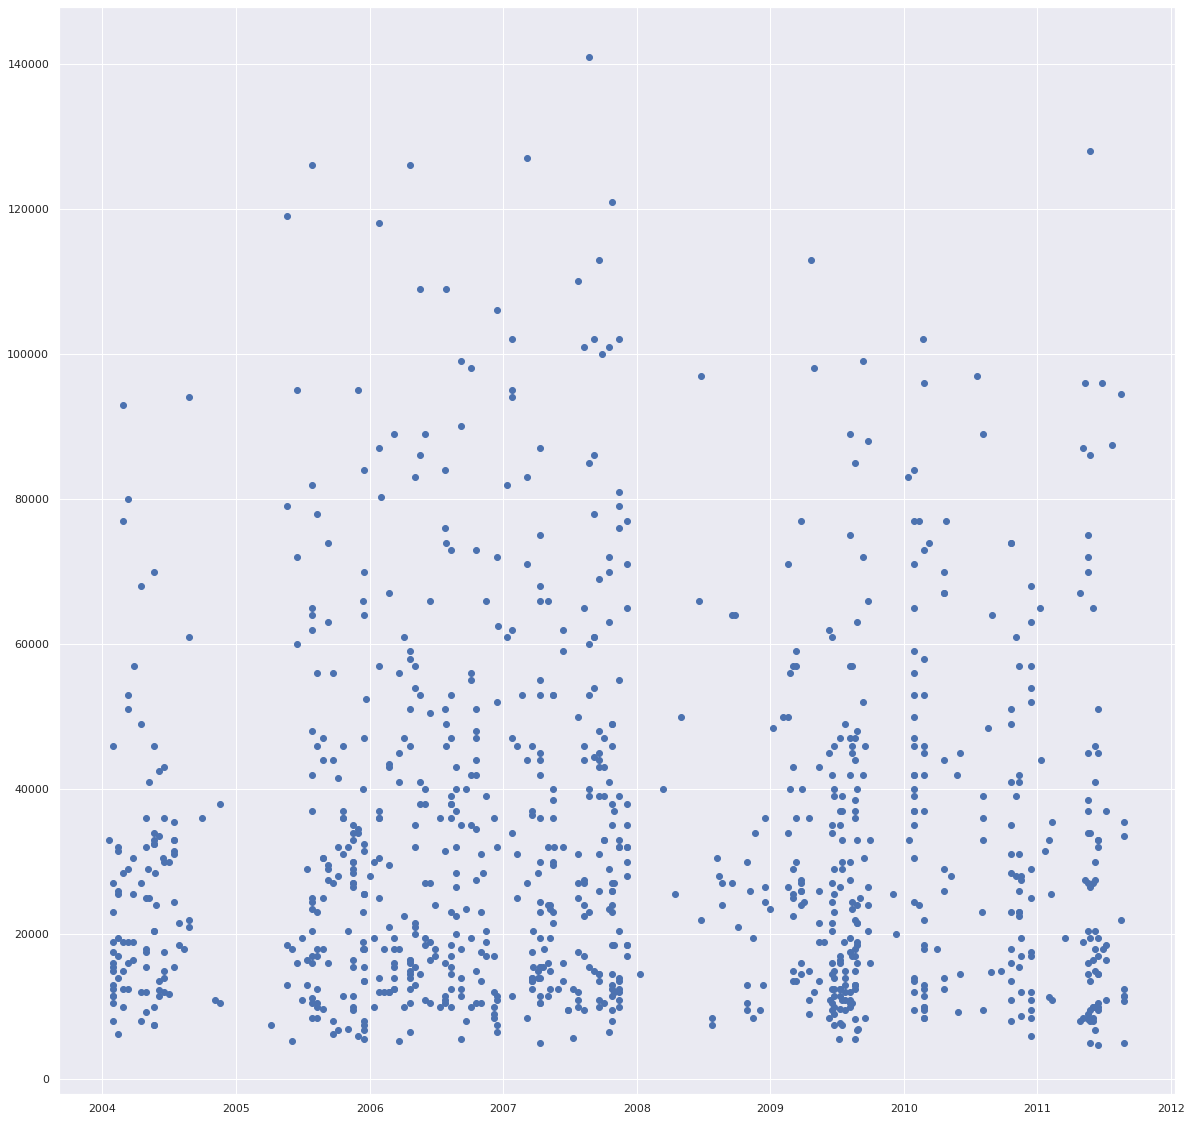

In [3]:
# Scatter plot
fig, ax = plt.subplots(figsize=(20,20))
ax = plt.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [4]:
# Observe that saledate is a Date (since the way we imported it)
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

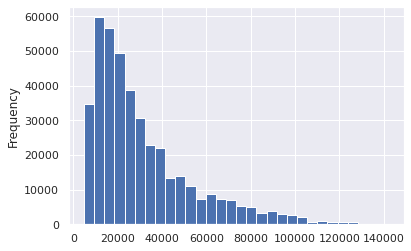

In [5]:
# Histogram for Sale Prices
# Shows that most ~20000 USD range
df.SalePrice.plot.hist(bins=30);

In [6]:
# Use Transpose to get a full view of the data since number of columns are large
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


## Sort by Sale Date




In [7]:
# Sort the data by sale date
df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [8]:
# Making a copy to work with
df_tmp = df.copy()

## Add datetime parameters for `saledate` column?

In [9]:
df_tmp['sale_year']  = df_tmp.saledate.dt.year
df_tmp['sale_month']  = df_tmp.saledate.dt.month
df_tmp['sale_day']  = df_tmp.saledate.dt.day
df_tmp['sale_dayofweek']  = df_tmp.saledate.dt.dayofweek
df_tmp['sale_dayofyear']  = df_tmp.saledate.dt.dayofyear

# now that we have created above, we can remove saledate column

df_tmp.drop("saledate", axis=1, inplace=True)

In [10]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [11]:
df_tmp['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modeling

Let us try and do some "model driven" EDA, since we know the evaluation metric (so let's try and move towards that)

## Changing All Non Numeric Data to Numeric

Converting all string to pandas categories

In [12]:
# Find all columns which contain Strings
# and turn all the string values to into categories

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        #print(label)
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [13]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Thanks to pandas Categories, we now have a way to access all of our data in the form of numbers.

But we still need to fix missing values before we can do any modeling!

In [14]:
# check percentage of missing data
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Fill missing values

Fill Numeric Missing Values

In [15]:
# Check for which numeric columns have missing values
# and fill with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #print(label)
            # Add a binary column which tells if the value was missing
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing with Median
            df_tmp[label] = content.fillna(content.median())

Fill Categorical Missing values

In [16]:
# Check for which numeric columns have missing values
# and fill with media
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # print(label)
        # Add a binary column which tells if the value was missing
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn Categories into numbers and add 1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [17]:
# All String values converted to numeric and all missing values taken care of
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [18]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_tmp.drop(['SalePrice'],axis=1), df_tmp['SalePrice'])

CPU times: user 13min 1s, sys: 2.73 s, total: 13min 3s
Wall time: 3min 32s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [19]:
# Score the model
model.score(df_tmp.drop(['SalePrice'],axis=1), df_tmp['SalePrice'])

0.9875468079970562

In [20]:
#df_tmp['sale_year'].value_counts()

# Split data into training and validation set
df_val = df_tmp[df_tmp.sale_year == 2012]
df_train = df_tmp[df_tmp.sale_year != 2012]

len(df_train), len(df_val)

(401125, 11573)

In [21]:
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_val, y_val = df_val.drop('SalePrice', axis=1), df_val.SalePrice

### Building an evaluation function

In [36]:
# Create evaluation function (the competition uses RMSLE)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):    
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
              "Valid MAE" : mean_absolute_error(y_val, val_preds),
              "Training RMSLE" : rmsle(y_train, train_preds),
              "Valid RMSLE" : rmsle(y_val, val_preds),
              "Training R^2" : r2_score(y_train, train_preds),
              "Valid R^2" : r2_score(y_val, val_preds)}
    return scores

### Testing the model on a subset

In [40]:
%%time

model = RandomForestRegressor(n_jobs = -1,
                              max_samples=10000,
                              random_state=42)
model.fit(X_train, y_train)


CPU times: user 13min 47s, sys: 5.01 s, total: 13min 52s
Wall time: 4min 5s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [28]:
model.score(X_val, y_val)

0.8320374995090507

In [42]:
show_scores(model)

{'Training MAE': 1578.2015208725463,
 'Valid MAE': 6120.959637950402,
 'Training RMSLE': 0.08426351714047395,
 'Valid RMSLE': 0.25557446689440955,
 'Training R^2': 0.9875150955953674,
 'Valid R^2': 0.8727175969771312}

## Hypterparameter training using RandomizedSearchCV

In [60]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators" : np.arange(10,100,10),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2),
           "max_features" : [0.5,1,'sqrt','auto'],
           "max_samples" : [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                                                    param_distributions=rf_grid,
                                                    n_iter=50,
                                                    cv=5,
                                                    verbose=True)
                              
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 14.9min finished


CPU times: user 8min 5s, sys: 1min 8s, total: 9min 14s
Wall time: 14min 56s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [61]:
# Find the best parameters

rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [56]:
# Evaluate the RandomizedSearchModel
show_scores(rs_model)

{'Training MAE': 6552.909560397465,
 'Valid MAE': 7974.086453985636,
 'Training RMSLE': 0.29313146677555196,
 'Valid RMSLE': 0.3177781958668027,
 'Training R^2': 0.81192530201247,
 'Valid R^2': 0.787250083403477}

## Fit the model again using HyperParameters found above on the full dataset


In [62]:
%%time

model = RandomForestRegressor(n_jobs = -1,
                              n_estimators=20,
                              min_samples_split=2,
                              min_samples_leaf=5,
                              max_features='auto',
                              max_depth=None,
                              random_state=42)
model.fit(X_train, y_train)


CPU times: user 2min 20s, sys: 653 ms, total: 2min 21s
Wall time: 40.9 s


RandomForestRegressor(min_samples_leaf=5, n_estimators=20, n_jobs=-1,
                      random_state=42)

In [63]:
show_scores(model)

{'Training MAE': 3015.8776331693125,
 'Valid MAE': 6143.351368669716,
 'Training RMSLE': 0.15053993321493306,
 'Valid RMSLE': 0.2537486410184336,
 'Training R^2': 0.9535863417129018,
 'Valid R^2': 0.8699212287936989}

# We were able to get a final RMSLE  value of 0.25!